In [1]:
#import the all liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data=pd.read_csv('car_selling.csv')

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
#first we check the null values
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


- in this dataset the null values are present in only categorical features.
- by handling these we use the concept of mode.which have highest categorical record in that columnn.
- we will fill that value into nan value.

In [6]:
data['mileage'].value_counts()
def impute_nan(df,variable):
    df[variable]=df[variable].fillna(df[variable].value_counts().index[0])

In [7]:
for i in ['mileage','engine','max_power','torque','seats']:
    impute_nan(data,i)

In [8]:
data.isnull().sum()  # So we filled the null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [9]:
#we have to drop the name feature because of that there is no use.
data.drop(['name','torque'],axis=1,inplace=True)

In [10]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


### now we go to visulization

In [11]:
data['year'].value_counts()

2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: year, dtype: int64

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='selling_price'>

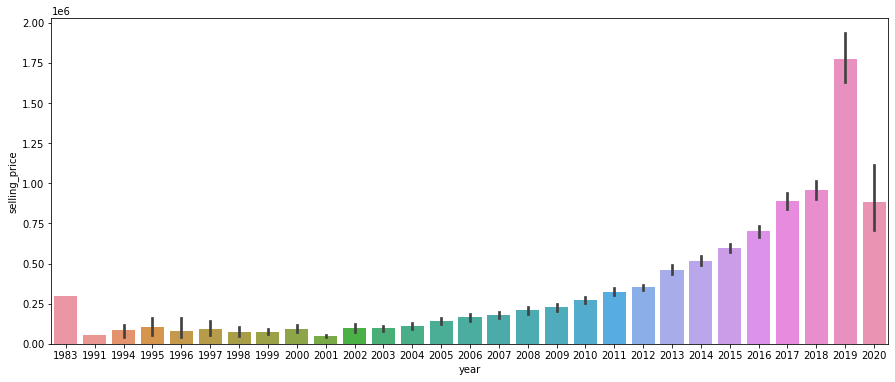

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,6)
sns.barplot(data['year'],data['selling_price'])

- from this above visulization In 2019 the car price very highest.
- And the second highest year is 2018.
- and the least year is 2001.

In [13]:
data['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='count'>

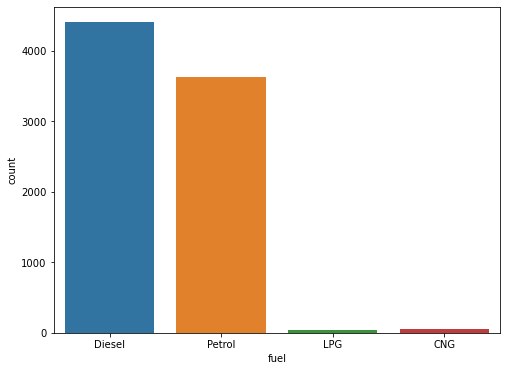

In [14]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(8,6)
sns.countplot(x='fuel',data=data)

- from the above graph,Disel type of cars sold lot.
- After that petrol type of cars.

<AxesSubplot:xlabel='fuel', ylabel='count'>

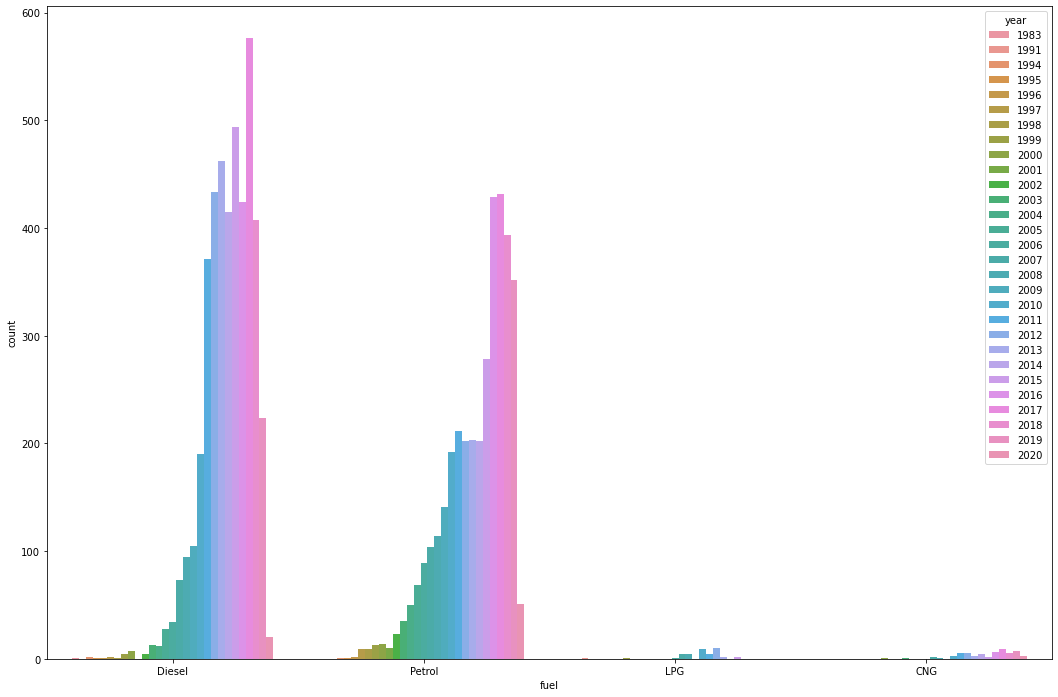

In [15]:
matplotlib.rcParams['figure.figsize']=(18,12)
sns.countplot(x='fuel',data=data,hue='year')

 ### observations
 1. In 2017 and 2018 the disel type of cars sold lot.
 2. In 2018 and 2019 the petrol type cars sold lot.

In [16]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [17]:
data['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='count'>

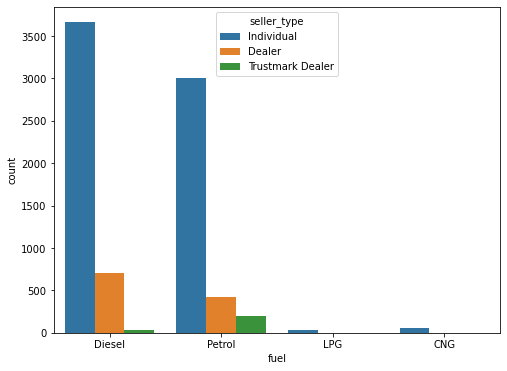

In [18]:
matplotlib.rcParams['figure.figsize']=(8,6)
sns.countplot(x='fuel',data=data,hue='seller_type')

### obeservations
1. The most of the disel cars are selled by seller_type is individual
2. after that the seller type is dealer
3. the trustmark dealer is low.

In [19]:
data['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

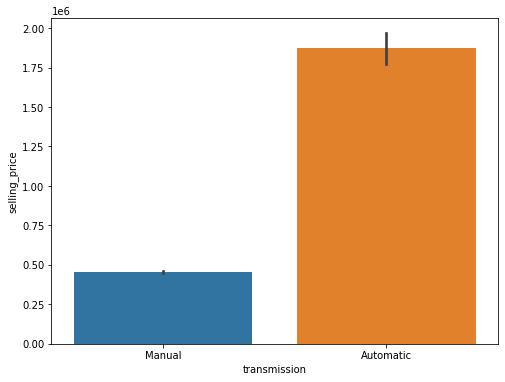

In [20]:
sns.barplot(x='transmission',y='selling_price',data=data) #from the below graph the automatic transmission type of cars have the highest price.

<AxesSubplot:xlabel='fuel', ylabel='km_driven'>

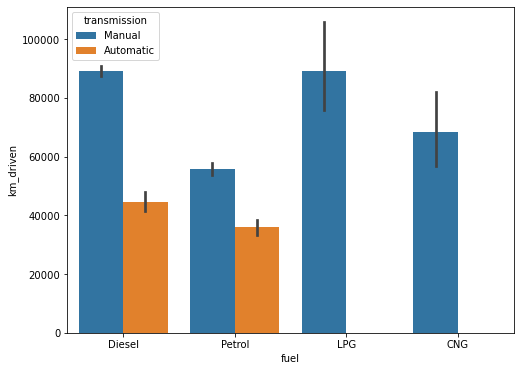

In [21]:
sns.barplot(x='fuel',y='km_driven',data=data,hue='transmission')

### Observations
1. from the above visulization most of the disel cars with manual transmission type have km_driven is more
2. from above visulization we conclude that manual transmission type has km_driven is more when compared to the automatic transmission.

In [22]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [23]:
data['seats'].value_counts()

5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

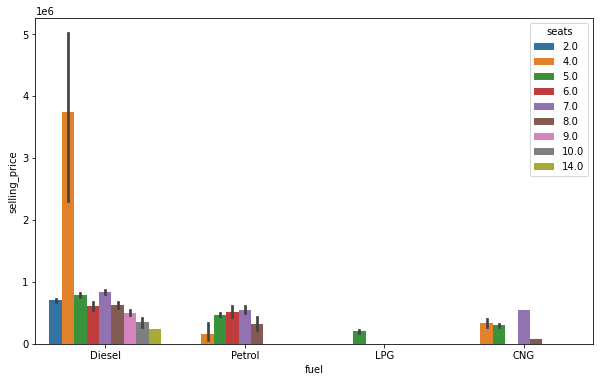

In [24]:
matplotlib.rcParams['figure.figsize']=(10,6)
sns.barplot(x='fuel',y='selling_price',data=data,hue='seats')

### observations
1. The disel type of car have 4 seats then it has the highest price.
2. for petrol engine type of car have 7 seats then it has highest price.

In [25]:
data['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

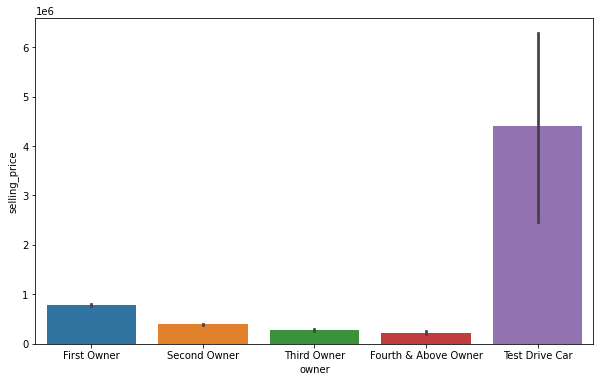

In [26]:
sns.barplot(x='owner',y='selling_price',data=data)

### Observations
1. from above observation the test driver car has highest price.

In [27]:
data['engine'].value_counts()

1248 CC    1238
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: engine, Length: 121, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   object 
 8   engine         8128 non-null   object 
 9   max_power      8128 non-null   object 
 10  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [29]:
#we have to convert the object type as a integer.
#for that we use a map function.
data['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [30]:
data['fuel']=data['fuel'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4})

In [31]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,1,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,2,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,1,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,2,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [32]:
data['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [33]:
data['seller_type']=data['seller_type'].map({'Individual':1,'Dealer':2,'Trustmark Dealer':3})

In [34]:
data['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [35]:
data['transmission']=data['transmission'].map({'Manual':1,'Automatic':2})

In [36]:
data['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [37]:
data['owner']=data['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

In [38]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,1,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,2,1,1,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,1,1,1,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,2,1,1,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int64  
 4   seller_type    8128 non-null   int64  
 5   transmission   8128 non-null   int64  
 6   owner          8128 non-null   int64  
 7   mileage        8128 non-null   object 
 8   engine         8128 non-null   object 
 9   max_power      8128 non-null   object 
 10  seats          8128 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 698.6+ KB


In [40]:
data['mileage']=data['mileage'].str.replace('kmpl','')
data['engine']=data['engine'].str.replace('CC','')
data['max_power']=data['max_power'].str.replace('bhp','')

In [41]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,1,1,23.4,1248,74,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0
2,2006,158000,140000,2,1,1,3,17.7,1497,78,5.0
3,2010,225000,127000,1,1,1,1,23.0,1396,90,5.0
4,2007,130000,120000,2,1,1,1,16.1,1298,88.2,5.0


In [42]:
data['mileage'].unique()

array(['23.4 ', '21.14 ', '17.7 ', '23.0 ', '16.1 ', '20.14 ',
       '17.3 km/kg', '23.59 ', '20.0 ', '19.01 ', '17.3 ', '19.3 ',
       '18.9 ', '18.15 ', '24.52 ', '19.7 ', '22.54 ', '21.0 ', '25.5 ',
       '26.59 ', '21.5 ', '20.3 ', '21.4 ', '24.7 ', '18.2 ', '16.8 ',
       '24.3 ', '14.0 ', '18.6 ', '33.44 km/kg', '23.95 ', '17.0 ',
       '20.63 ', '13.93 ', '16.0 ', '17.8 ', '18.5 ', '12.55 ', '12.99 ',
       '14.8 ', '13.5 ', '26.0 ', '20.65 ', '27.3 ', '11.36 ', '17.68 ',
       '14.28 ', '18.53 ', '14.84 ', '21.12 ', '20.36 ', '21.27 ',
       '18.16 ', '22.0 ', '25.1 ', '20.51 ', '21.66 ', '25.2 ', '22.9 ',
       '16.02 ', '20.54 ', '22.77 ', '15.71 ', '23.1 ', '19.02 ',
       '19.81 ', '26.2 km/kg', '16.47 ', '15.04 ', '19.1 ', '21.79 ',
       '18.8 ', '21.21 ', '15.37 ', '11.79 ', '19.0 ', '14.3 ', '15.8 ',
       '15.1 ', '19.09 ', '22.32 ', '21.9 ', '14.53 ', '21.63 ', '20.85 ',
       '20.45 ', '19.67 ', '23.01 ', '20.77 ', '17.92 ', '17.01 ',
       '22.37 ', '1

In [43]:
data['mileage']=data['mileage'].str.replace('km/kg','')

In [44]:
data['engine']=data['engine'].astype(int)

In [45]:
data['mileage']=data['mileage'].astype(float)

In [46]:
data['max_power'].value_counts().sample(20)


91.7        10
83.1        45
103          2
53           4
46.3       162
103.3        8
104.68      10
143          3
125          7
117.6       14
103.6       48
203.2        1
92.7         1
280          6
188          7
197.2        1
108.6       14
110.5        1
81.83       97
58           3
Name: max_power, dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int64  
 4   seller_type    8128 non-null   int64  
 5   transmission   8128 non-null   int64  
 6   owner          8128 non-null   int64  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   int32  
 9   max_power      8128 non-null   object 
 10  seats          8128 non-null   float64
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 666.9+ KB


In [48]:
data.drop(['max_power'],axis=1,inplace=True)

### Transformation
##### standardisation

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
df1=scaler.fit_transform(data)

In [51]:
df2=pd.DataFrame(df1,columns=data.columns)

In [52]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,0.048464,-0.233529,1.338363,-0.879460,-0.423004,-0.385158,-0.640403,1.003214,-0.411305,-0.427258
1,0.048464,-0.332759,0.887411,-0.879460,-0.423004,-0.385158,0.745063,0.435734,0.090536,-0.427258
2,-1.929775,-0.595720,1.241098,0.972898,-0.423004,-0.385158,2.130528,-0.428040,0.088528,-0.427258
3,-0.940656,-0.512615,1.011202,-0.879460,-0.423004,-0.385158,-0.640403,0.902775,-0.114215,-0.427258
4,-1.682495,-0.630451,0.887411,0.972898,-0.423004,-0.385158,-0.640403,-0.829795,-0.310937,-0.427258


In [55]:
df2['price']=df2['selling_price']

In [56]:
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,price
0,0.048464,-0.233529,1.338363,-0.879460,-0.423004,-0.385158,-0.640403,1.003214,-0.411305,-0.427258,-0.233529
1,0.048464,-0.332759,0.887411,-0.879460,-0.423004,-0.385158,0.745063,0.435734,0.090536,-0.427258,-0.332759
2,-1.929775,-0.595720,1.241098,0.972898,-0.423004,-0.385158,2.130528,-0.428040,0.088528,-0.427258,-0.595720
3,-0.940656,-0.512615,1.011202,-0.879460,-0.423004,-0.385158,-0.640403,0.902775,-0.114215,-0.427258,-0.512615
4,-1.682495,-0.630451,0.887411,0.972898,-0.423004,-0.385158,-0.640403,-0.829795,-0.310937,-0.427258,-0.630451


In [57]:
df2.drop(['selling_price'],axis=1,inplace=True)

In [58]:
df2.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,price
0,0.048464,1.338363,-0.879460,-0.423004,-0.385158,-0.640403,1.003214,-0.411305,-0.427258,-0.233529
1,0.048464,0.887411,-0.879460,-0.423004,-0.385158,0.745063,0.435734,0.090536,-0.427258,-0.332759
2,-1.929775,1.241098,0.972898,-0.423004,-0.385158,2.130528,-0.428040,0.088528,-0.427258,-0.595720
3,-0.940656,1.011202,-0.879460,-0.423004,-0.385158,-0.640403,0.902775,-0.114215,-0.427258,-0.512615
4,-1.682495,0.887411,0.972898,-0.423004,-0.385158,-0.640403,-0.829795,-0.310937,-0.427258,-0.630451


In [62]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [64]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,y_train,x_test,y_test=train_test_split(x,y,random_state=42)

In [72]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6096, 9) (2032, 9) (6096,) (2032,)


In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [74]:
lr.fit(x_train,x_test)

LinearRegression()

In [76]:
y_pred=lr.predict(y_train)

In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.41392240143878306

In [79]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.3603295388256001
Mean Squared Error: 0.41392240143878306
Root Mean Squared Error: 0.6433680140003721
r2_score: 0.56838586853261
